In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [3]:
data = np.loadtxt('linear_regression.txt', delimiter = ',')
#separate predictor from target variable
X = np.c_[np.ones(data.shape[0]), data[:,0]]
y = np.c_[data[:,1]]

In [4]:
def normalEquation(X,y):
    theta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
    return theta

In [37]:
theta_normal = normalEquation(X,y)

In [38]:
theta_normal

array([[-3.89578088],
       [ 1.19303364]])

In [6]:
def compute_gradient(x,y,theta):
    n = len(x)
    gradient_0 = 2.0 / n * sum([(theta[0] + theta[1] * x[i] - y[i]) for i in range(n)])
    gradient_1 = 2.0 / n * sum([(theta[0] + theta[1] * x[i] - y[i]) * x[i] for i in range(n)])
    return [gradient_0,gradient_1]

In [7]:
def compute_new_theta(theta, direction, step):
    # move step_size in the direction from thetas
    return [theta_i + step * direction_i for theta_i, direction_i in zip(theta, direction)]

In [8]:
def compute_distance(old,new):
    temp = [ i-j for i, j in zip(old,new)]
    temp_sum = sum(i**2 for i in temp)
    return math.sqrt(temp_sum)

In [9]:
def compute_cost(x,y,theta):
    cost = 0.5*sum([(j - (theta[0]+theta[1]*i))**2 for i ,j in zip(x,y)])/len(x)
    return cost

In [10]:
def gradient_descent(l, x, y, tolerance=0.0000001, max_iter=100000):
    iter = 0
    theta = [0, 0]
    cost_history = []
    theta_history = []
    while True:
        gradient = compute_gradient(x, y, theta)
        next_theta = compute_new_theta(theta, gradient, l)

        if compute_distance(next_theta, theta) < tolerance:  # stop if we're converging
            break
        theta = next_theta  # continue if we're not
        cost = compute_cost(x,y,theta)
        cost_history.append(cost)
        theta_history.append(theta)
        iter += 1  # update iter

        if iter == max_iter:
            print ('Max iteractions exceeded!')
            break;

    return theta,cost_history,theta_history

In [11]:
theta,cost_history,theta_history = gradient_descent(-0.005,data[:,0],data[:,1])

In [12]:
theta

[-3.8957257598447987, 1.193028106941718]

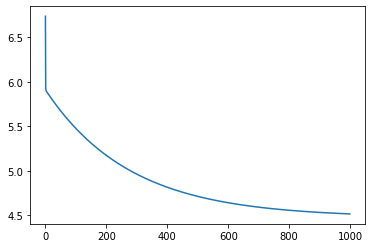

In [13]:
plt.plot(cost_history[0:1000])

In [14]:
theta_0 = np.arange(-10, 10, 0.25)
theta_1 = np.arange(-1,4 , 0.25)

In [15]:
theta_1

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
        1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,
        3.5 ,  3.75])

In [16]:
theta_0,theta_1 = np.meshgrid(theta_0,theta_1)

In [17]:
Z = np.array(0.5*sum([(j - (theta_0+theta_1*i))**2 for i ,j in data])/len(data)).reshape(theta_0.shape)

In [18]:
Z

array([[328.09290555, 322.12442179, 316.21843802, ...,  51.39465581,
         50.23867204,  49.14518828],
       [273.55408062, 268.09558436, 262.6995881 , ...,  36.12486838,
         35.47887212,  34.89537585],
       [224.10300212, 219.15449336, 214.26848459, ...,  25.94282738,
         25.80681861,  25.73330985],
       ...,
       [ 92.86639575,  95.56769949,  98.33150322, ..., 483.74178351,
        491.25558724, 498.83189098],
       [124.81926007, 128.03055131, 131.30434254, ..., 554.96368533,
        562.98747656, 571.0737678 ],
       [161.85987081, 165.58114955, 169.36492829, ..., 631.27333357,
        639.80711231, 648.40339105]])

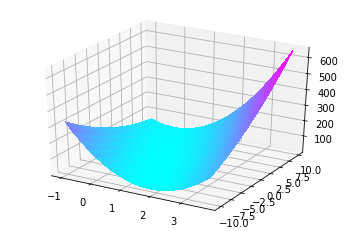

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta_1,theta_0,Z,cmap=cm.cool,linewidth=0, antialiased=False)
plt.show()

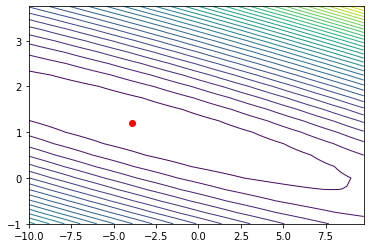

In [20]:
plt.contour(theta_0, theta_1, Z,40,cmap="viridis",linewidths=1)
plt.plot(theta[0],theta[1],'ro',label="point")
plt.show()

In [33]:
def plotData(x, y):
    fig = plt.figure() 
    plt.plot(x, y, 'ro', ms=10, mec='k')


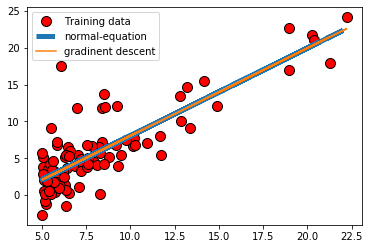

In [46]:
plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta_normal), '-',linestyle='dashed',linewidth=5)
plt.plot(X[:, 1], np.dot(X, theta),'-')
plt.legend(['Training data', 'normal-equation','gradinent descent']);